<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 4</h1>

In questo notebook sono riportati gli esercizi per la cui soluzione è necessario il codice **lammps.4**: i grafici qui presenti sono in python, ma nella cartella è possibile trovarne di analoghi fatti con gnuplot. Sono anche riportati i comandi per creare i plot, salvati in dei file '.gnuplot'. 

Per eseguire il notebook sui computer di laboratorio, è necessario lanciare il seguente comando e selezionare il kernel python corretto.

<center>

`module load python3/anaconda`
<center>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from scipy.stats import norm
from scipy.optimize import curve_fit

<center>
<h1 style="color:blue; font-size:55px;"> Esercizio 4.4</h1>

L'obiettivo di questo esercizio è valutare quale sia il coefficiente di diffusione di una molecola d'acqua posta su una superficie di atomi d'oro alla temperatura di 50 K. In seguito è riportata una gif in cui si può vedere l'evoluzione del sistema.

<center>

![Diffusione molecola acqua](./animation/diffusion.gif)
</center>

Per calcolare il coefficiente di diffusione è neccessario valutare quale sia la distanza quadratica media percorsa dalla molecola ad un certo tempo t. Da tale quantità è possibile valutare, mediante un fit lineare, il coefficiente di diffusione dato che 

$$
d_{ms}\,=\,2Dt
$$

Tale relazione è veritiera per una diffusione infinita, che non è la casistica da noi presa in analisi. Per stimare il coefficiente di diffusione quello che possiamo fare è individuare la regione in cui la dipendenza del cammino quadratico medio dal tempo è circa lineare, per poi fare un fit ristretto a questo intervallo. Il coefficiente angolare sarà il doppio del coefficiente di diffusione.

In [2]:
def linear_model(x, m, c):
    return m * x + c

Il coefficiente di diffusione è pari a: 0.5895


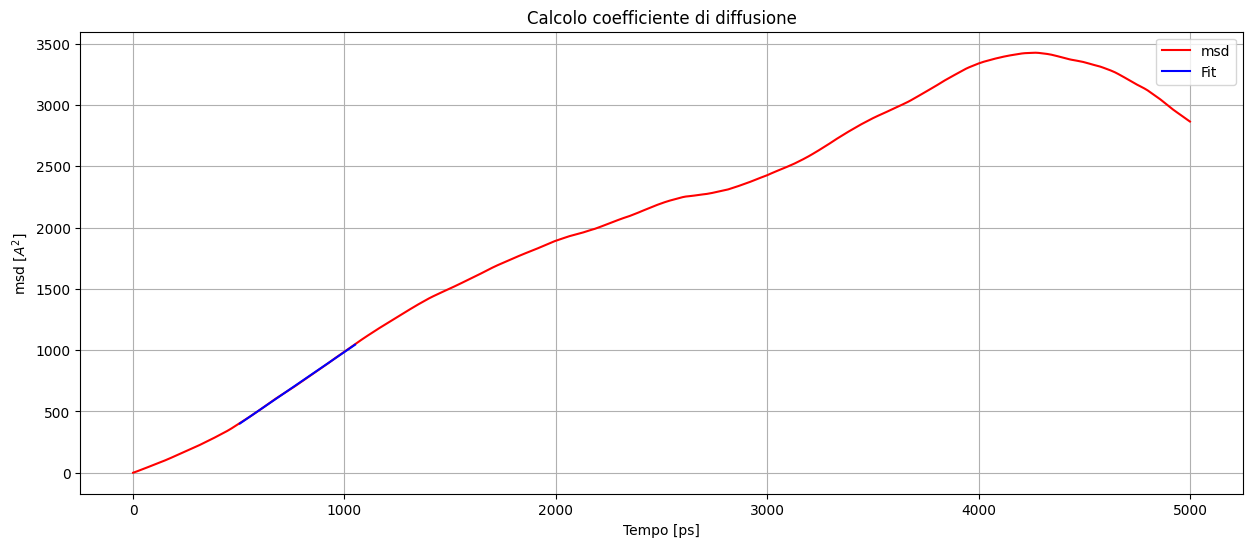

In [7]:
fig = plt.figure(figsize = (15, 6))

appo = np.loadtxt('diff/msd_py.dat')
plt.plot(appo[:, 0], appo[:, 1], color="red", label = 'msd')



#------------------------------------------------------#
#       Determinazione coefficiente di diffusione      #
#------------------------------------------------------#
x = appo[101:211, 0]
y = appo[101:211, 1]

params, covariance = curve_fit(linear_model, x, y) 
mf = params[0]
cf = params[1]
y_fit = mf * x + cf

plt.plot(x, y_fit, color="blue", label = 'Fit')
print('Il coefficiente di diffusione è pari a: ' + str(round(mf/2, 4)))


plt.title("Calcolo coefficiente di diffusione")
plt.xlabel("Tempo [ps]")
plt.ylabel(r"msd [$A^2$]")
plt.legend(loc = 'best')
plt.grid()
plt.show()

Il coefficiente di diffusione a 50 Kelvin risulta essere pari a:

$$
D\,=\,0.5895
$$